# TELCO churn

In [1]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("training.csv") # charger les données d'entraînement
train.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE


## EXPLORATORY DATA ANALYSIS

In [3]:
train.shape

(11981, 19)

We are working on 11981 examples with 18 features and a binary response variable CHURNED indicating wether there was a churn or not. 

In [4]:
train.describe()

,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION
count,11981.000000,11981.000000,11981.000000,11981.000000,11346.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000
mean,503.625376,47595.943703,80.185460,23.785577,506521.681650,2.070194,2.508639,155.541941,383.495868,7.540356,3.079250,5.972957
std,457.156513,22293.736749,84.587419,26.680037,256808.319571,1.249974,1.120546,47.905580,210.601172,8.768863,1.650221,4.361189
min,0.000000,10032.500000,-2.000000,0.000000,150015.000000,0.000000,1.000000,50.000000,130.000000,0.000000,0.300000,1.000000
25%,181.818182,29367.000000,0.000000,0.000000,268511.250000,1.000000,2.000000,121.000000,217.000000,1.000000,1.900000,2.000000
50%,360.995851,44992.500000,56.000000,15.000000,469775.500000,2.000000,3.000000,149.000000,322.000000,4.000000,2.700000,5.000000
75%,685.714286,65078.000000,171.000000,41.000000,722464.250000,3.000000,4.000000,182.000000,515.000000,13.000000,3.800000,9.000000
max,6600.000000,105355.500000,298.000000,89.000000,999996.000000,7.000000,4.000000,521.000000,899.000000,29.000000,21.000000,15.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CUSTOMER_ID                  11981 non-null  object 
 1   COLLEGE                      11981 non-null  object 
 2   DATA                         11981 non-null  float64
 3   INCOME                       11981 non-null  float64
 4   OVERCHARGE                   11981 non-null  int64  
 5   LEFTOVER                     11981 non-null  int64  
 6   HOUSE                        11346 non-null  float64
 7   LESSTHAN600k                 11346 non-null  object 
 8   CHILD                        11981 non-null  int64  
 9   JOB_CLASS                    11981 non-null  int64  
 10  REVENUE                      11981 non-null  float64
 11  HANDSET_PRICE                11981 non-null  int64  
 12  OVER_15MINS_CALLS_PER_MONTH  11981 non-null  int64  
 13  TIME_CLIENT     

Nous avons 5 float, 7 entiers et 7 objets

In [6]:
train.columns

Index(['CUSTOMER_ID', 'COLLEGE', 'DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER',
       'HOUSE', 'LESSTHAN600k', 'CHILD', 'JOB_CLASS', 'REVENUE',
       'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION',
       'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'CHURNED'],
      dtype='object')

In [7]:
churned = pd.get_dummies(train['CHURNED'],drop_first=False) #transformer la colonne leave ou stay à une colonne booléenne leave : false ou true
train = pd.concat([train,churned],axis=1)
train.head(2)

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,...,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED,LEAVE,STAY
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,...,155,1,1.2,15,very_unsat,little,considering,STAY,0,1
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,...,245,27,2.7,4,unsat,little,considering,LEAVE,1,0


In [8]:
train=train.drop('STAY',axis=1)
train.head(2)

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED,LEAVE
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY,0
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE,1


### Correlation entre les attributs

In [9]:
columns = [ 'DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER',
       'HOUSE', 'CHILD', 'JOB_CLASS', 'REVENUE',
       'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT',
       'AVERAGE_CALL_DURATION'] # calculer la correlation deux à deux entre les colonnes continues

In [10]:
numdata = train[columns]

In [11]:
numdata.corr() 

,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION
DATA,1.000000,-0.131043,-0.363838,-0.268361,-0.040929,-0.255969,-0.001629,0.005521,0.010695,-0.275672,0.541771,0.250296
INCOME,-0.131043,1.000000,0.368508,0.011302,-0.019709,0.001740,-0.003997,0.005087,0.666491,0.284852,0.000997,-0.018204
OVERCHARGE,-0.363838,0.368508,1.000000,0.010350,0.035223,0.015081,0.005043,0.015058,-0.017625,0.772814,-0.008855,0.008627
LEFTOVER,-0.268361,0.011302,0.010350,1.000000,0.015579,-0.000375,0.010492,-0.005911,0.011050,-0.003383,0.002295,-0.657226
HOUSE,-0.040929,-0.019709,0.035223,0.015579,1.000000,0.008648,0.001068,-0.001388,-0.028208,0.032863,0.006234,-0.014851
CHILD,-0.255969,0.001740,0.015081,-0.000375,0.008648,1.000000,0.012529,-0.004246,-0.003304,0.014847,-0.002847,0.001849
JOB_CLASS,-0.001629,-0.003997,0.005043,0.010492,0.001068,0.012529,1.000000,-0.010926,-0.012010,0.003067,0.000959,0.001243
REVENUE,0.005521,0.005087,0.015058,-0.005911,-0.001388,-0.004246,-0.010926,1.000000,-0.003162,0.007734,-0.009009,-0.004126
HANDSET_PRICE,0.010695,0.666491,-0.017625,0.011050,-0.028208,-0.003304,-0.012010,-0.003162,1.000000,-0.009194,-0.002415,-0.023101
OVER_15MINS_CALLS_PER_MONTH,-0.275672,0.284852,0.772814,-0.003383,0.032863,0.014847,0.003067,0.007734,-0.009194,1.000000,-0.007686,0.019714


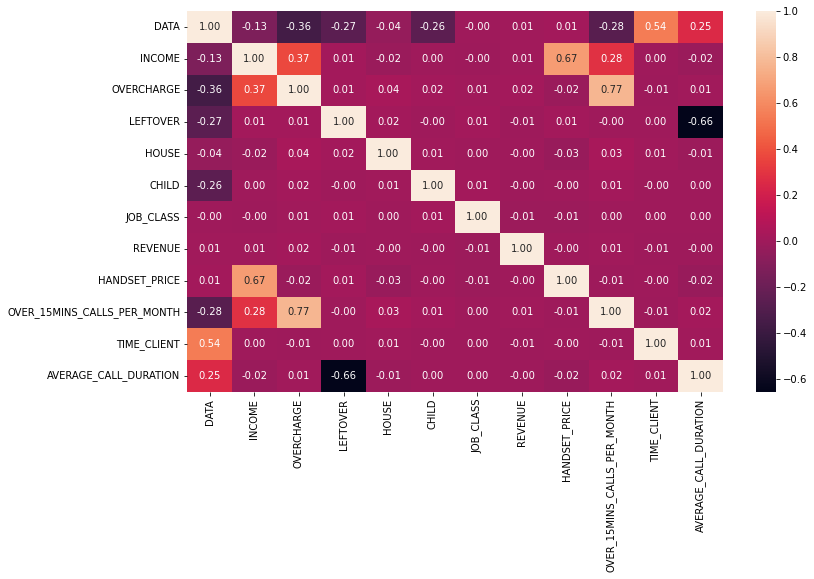

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(numdata.corr(),annot = True,fmt=".2f", annot_kws={"size": 10})
plt.show()

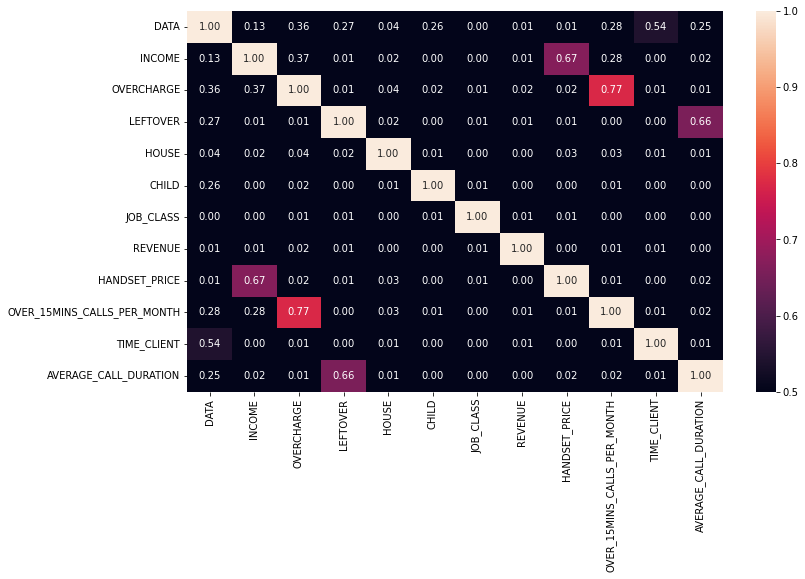

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(abs(numdata.corr()), vmin= 0.5, vmax=1 ,annot = True,fmt=".2f", annot_kws={"size": 10})
plt.show()

Une forte corrélation entre : INCOME & HANDSET PRICE (ce qui est cohérent parce que plus les revenus sont élevés plus la valeur du téléphone est importante) , OVERCHARGE & OVER_15MINS_CALLS_PER_MONTH (cohérent parce que plus la surcharge est élevée plus la moyenne des appels rique de dépasser les 15 min) , une forte anti-correlation entre LEFTOVER & AVERAGE_CALL_DURATION parce que le nombre de minutes restantes par mois n'est pas en corrélation avec la moyenne des durées des appels.

### Detection of Outliers ( IQR method ) 

In [14]:
from collections import Counter
# columns.remove('LEAVE')
def detect_outliers(train,n, features):
   
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(train[col], 25)
        Q3 = np.percentile(train[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = train[(train[col] < Q1 - outlier_step) | (train[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
 
    return multiple_outliers
outliers_to_drop = detect_outliers(train,2, columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 6 indices:  [435, 2414, 9496, 9596, 9609, 10533]


In [15]:
train.iloc[outliers_to_drop,:]

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED,LEAVE
435,C100584,zero,1914.110429,67778.0,63,56,463640.0,True,1,4,274.0,543,3,9.4,2,avg,little,considering,LEAVE,1
2414,C103240,zero,1920.000000,49489.0,0,74,587323.0,True,1,4,287.0,294,0,7.4,1,very_unsat,little,considering,STAY,0
9496,C112683,one,1872.000000,74803.5,0,15,255580.0,True,3,4,280.0,836,0,14.6,2,very_unsat,little,never_thought,STAY,0
9596,C112815,one,2160.000000,12492.0,0,11,617453.0,False,0,2,303.0,202,0,7.2,5,unsat,little,considering,LEAVE,1
9609,C112830,zero,2460.000000,26845.0,0,10,351225.0,True,1,3,309.0,236,1,7.2,5,very_unsat,high,actively_looking_into_it,STAY,0
10533,C114060,zero,1710.000000,18125.0,0,0,879599.0,False,2,2,302.0,230,1,6.7,9,very_unsat,high,perhaps,STAY,0


In [16]:
train.drop(outliers_to_drop, axis = 0)

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED,LEAVE
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY,0
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE,1
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY,0
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE,1
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,C115967,one,829.787234,40567.0,41,7,458723.0,True,0,4,128.0,305,5,3.9,4,avg,little,actively_looking_into_it,STAY,0
11977,C115968,zero,723.529412,75007.5,70,0,328171.0,True,3,1,199.0,610,5,4.1,13,unsat,little,actively_looking_into_it,LEAVE,1
11978,C115970,zero,80.000000,77674.5,0,80,439967.0,True,3,1,94.0,750,1,1.4,1,unsat,little,actively_looking_into_it,LEAVE,1
11979,C115972,zero,77.777778,37730.5,0,17,795808.0,False,3,1,142.0,284,0,1.7,8,very_unsat,little,considering,STAY,0


Afin de faire nos prédictions, nous allons remplacer les colonnes de type objets en nombres respectifs

In [17]:
train['CONSIDERING_CHANGE_OF_PLAN'].unique()

array(['considering', 'actively_looking_into_it', 'never_thought', 'no',
       'perhaps'], dtype=object)

In [18]:
def transform_data (train) :
    train['REPORTED_USAGE_LEVEL'] = train['REPORTED_USAGE_LEVEL'].replace({
        'little':2 ,
        'very_little': 1,
        'very_high': 5,
        'high': 4,
        'avg': 3
    }) # attribuer à chaque avis une note allant de 1 à 5 ; 1 étant la pire note et 5 la meilleure 
    train['REPORTED_SATISFACTION'] = train['REPORTED_SATISFACTION'].replace({
        'very_unsat': 1,
        'unsat': 2,
        'very_sat': 5,
        'sat': 4,
        'avg': 3
    }) # attribuer à chaque avis une note allant de 1 à 5 ; 1 étant la pire note et 5 la meilleure 
    train['CONSIDERING_CHANGE_OF_PLAN'] = train['CONSIDERING_CHANGE_OF_PLAN'].replace({
        'considering': 2,
        'actively_looking_into_it': 1,
        'never_thought': 5,
        'no': 4,
        'perhaps': 3
    }) # attribuer à chaque avis une note allant de 1 à 3 ; 1 étant la pire note et 3 la meilleure 
    train['COLLEGE'] = train['COLLEGE'].replace('zero', 0)
    train['COLLEGE'] = train['COLLEGE'].replace('one', 1)
    print(train.head(2))

In [19]:
transform_data(train)

  CUSTOMER_ID  COLLEGE        DATA   INCOME  OVERCHARGE  LEFTOVER     HOUSE  \
0     C100000        0  660.000000  19995.0           0         0  897338.0   
1     C100001        1  317.647059  31477.0         155        15  393396.0   

  LESSTHAN600k  CHILD  JOB_CLASS  REVENUE  HANDSET_PRICE  \
0        False      4          3    160.0            155   
1         True      0          1    100.0            245   

   OVER_15MINS_CALLS_PER_MONTH  TIME_CLIENT  AVERAGE_CALL_DURATION  \
0                            1          1.2                     15   
1                           27          2.7                      4   

   REPORTED_SATISFACTION  REPORTED_USAGE_LEVEL  CONSIDERING_CHANGE_OF_PLAN  \
0                      1                     2                           2   
1                      2                     2                           2   

  CHURNED  LEAVE  
0    STAY      0  
1   LEAVE      1  


### Missing Values

In [20]:
train.isnull().sum()

CUSTOMER_ID                      0
COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          635
LESSTHAN600k                   635
CHILD                            0
JOB_CLASS                        0
REVENUE                          0
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
TIME_CLIENT                      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION            0
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURNED                          0
LEAVE                            0
dtype: int64

The missing values are in House and LESSthan600k let's detect them using different methods

In [21]:
def transform_missing_values (column):
    median = column.median()
    column.fillna(median,inplace=True)

In [22]:
examples_with_missingvalues = train[train.isnull().any(axis=1)]
examples_with_missingvalues

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED,LEAVE
46,C100071,1,1320.000000,50355.0,0,0,NaN,NaN,1,1,325.0,417,1,4.4,15,2,2,2,STAY,0
53,C100080,0,134.020619,45751.0,191,24,NaN,NaN,1,1,143.0,292,16,2.3,1,1,1,2,STAY,0
196,C100270,0,247.422680,40576.0,206,47,NaN,NaN,2,2,186.0,164,19,5.4,1,1,2,3,LEAVE,1
214,C100290,0,190.140845,66953.5,184,0,NaN,NaN,3,4,103.0,340,27,2.8,10,1,5,2,STAY,0
220,C100299,1,511.111111,38169.5,0,17,NaN,NaN,4,4,152.0,253,0,4.6,6,1,4,2,STAY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11863,C115813,1,585.365854,55693.5,64,67,NaN,NaN,0,1,101.0,293,5,2.2,2,3,2,5,STAY,0
11882,C115836,0,1010.989011,90907.0,173,0,NaN,NaN,0,3,157.0,897,27,7.2,13,1,1,1,LEAVE,1
11905,C115860,1,180.000000,27140.5,0,0,NaN,NaN,3,1,133.0,316,1,1.6,14,1,5,1,STAY,0
11953,C115932,1,561.403509,26096.5,71,21,NaN,NaN,1,2,110.0,248,4,3.2,6,3,1,1,STAY,0


<AxesSubplot:>

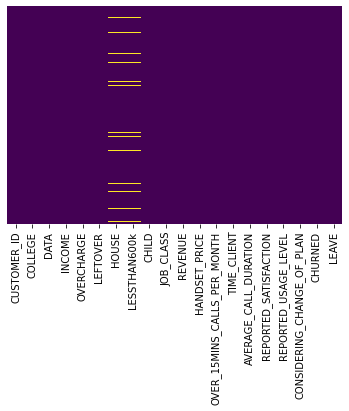

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Afin d'éviter de perdre d'importantes information, ces examples ne seront pas supprimés. En revanche,les valeurs vides seront remplacées par la moyenne de la colonne HOUSE qui est 506521.6816499207 et donc False pour LESSTHAN600k

In [24]:
transform_missing_values(train['HOUSE'])

In [25]:
train['LESSTHAN600k'].fillna(True,inplace=True)

In [26]:
train.isnull().sum()

CUSTOMER_ID                    0
COLLEGE                        0
DATA                           0
INCOME                         0
OVERCHARGE                     0
LEFTOVER                       0
HOUSE                          0
LESSTHAN600k                   0
CHILD                          0
JOB_CLASS                      0
REVENUE                        0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
TIME_CLIENT                    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
CHURNED                        0
LEAVE                          0
dtype: int64

## Visualizing our data

<AxesSubplot:xlabel='LEAVE', ylabel='count'>

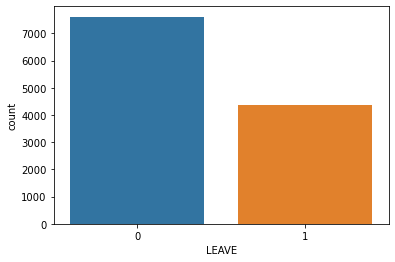

In [27]:
sns.countplot(x='LEAVE',data=train)

Nos données sont bien, on a pas de problème de biais 

### Churn vs College 

<AxesSubplot:xlabel='LEAVE', ylabel='count'>

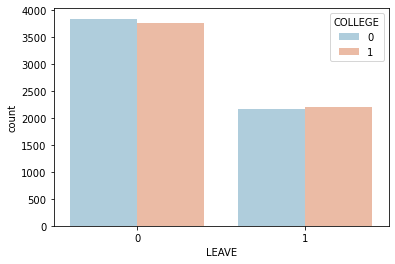

In [28]:
sns.countplot(x='LEAVE',data=train,hue='COLLEGE',palette='RdBu_r')

On voit que l'éducation supérieure n'impacte pas le désabonnement. Le même niveau d'éducation donne un nombre égal de désabonnement ou non.

### Churn vs Job Class

<AxesSubplot:xlabel='LEAVE', ylabel='count'>

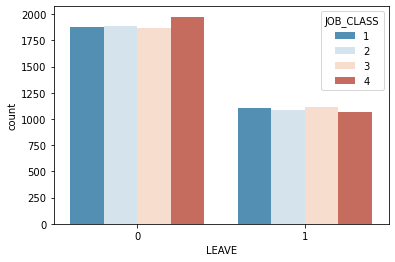

In [29]:
sns.countplot(x='LEAVE',data=train,hue='JOB_CLASS',palette='RdBu_r')

La même conclusion pour le type du métier. On remarque que ces deux variables ne sont pas très pertinentes.

### Churn vs Reported Satisfaction

<AxesSubplot:xlabel='LEAVE', ylabel='count'>

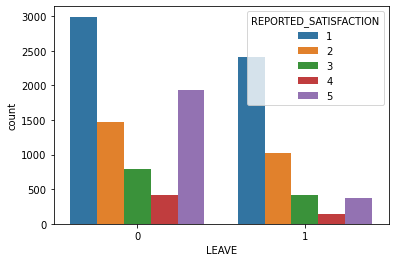

In [30]:
sns.countplot(x='LEAVE',data=train,hue='REPORTED_SATISFACTION')

Les résultats sont cohérents les personnes qui se désabonnent sont en majorité celles qui sont les moins satisfaites et celles qui restent sont celles qui sont les plus satisfaites. 

### Churn vs Reported Change of Plan

<AxesSubplot:xlabel='LEAVE', ylabel='count'>

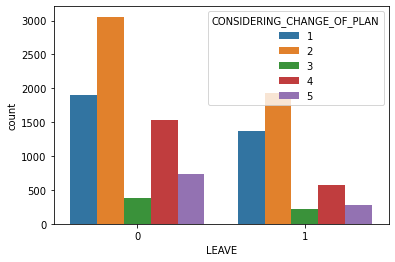

In [31]:
sns.countplot(x='LEAVE',data=train,hue='CONSIDERING_CHANGE_OF_PLAN')

On voit que dans les deux cas, les personnes qui hésitent à changer d'opérateur sont en majorité. En revanche, les personnes qui ne veulent pas changer d'offre ne se désabonnent pas et les personnes qui cherchent de nouveaux opérateurs ne se désabonnent pas forcément.

### Churn vs Reported Usage Level

<AxesSubplot:xlabel='LEAVE', ylabel='count'>

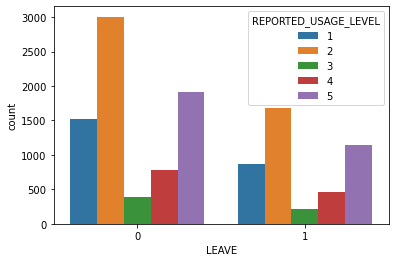

In [32]:
sns.countplot(x='LEAVE',data=train,hue='REPORTED_USAGE_LEVEL')

La majorité dans les deux cas sont les personnes qui n'utilisent pas beaucoup leur offre. Les résultats obtenus ne sont pas très pertinents.


In [33]:
cat_columns = ['LEFTOVER','OVERCHARGE','AVERAGE_CALL_DURATION','OVER_15MINS_CALLS_PER_MONTH','TIME_CLIENT']

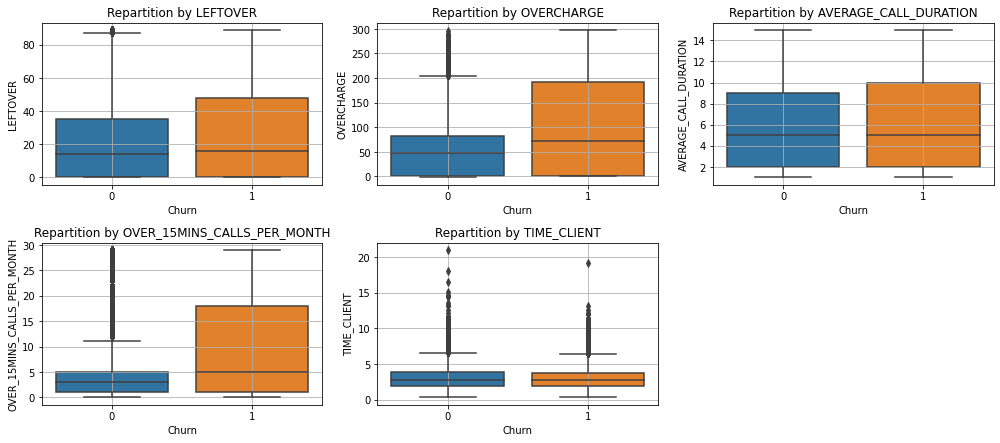

In [34]:
plt.figure(figsize=(14, len(cat_columns) * 3))
for idx, feature in enumerate(cat_columns, 1):
    plt.subplot(len(cat_columns), 3, idx)
    sns.boxplot(data = train, x='LEAVE', y=feature)
    #sns.histplot(data[feature])
    plt.title(f'Repartition by {feature}')
    plt.ylabel(f'{feature}')
    plt.xlabel('Churn')
    plt.grid(True)
plt.tight_layout()
plt.show()

On remarque que les personnes qui se désabonnement sont celles qui ont le plus d'overcharge et de temps d'appels ce qui est cohérent. En revanche TIME_CLIENT est presque égale pour les deux probabilités de désabonnement.

# Numerical Data

In [35]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

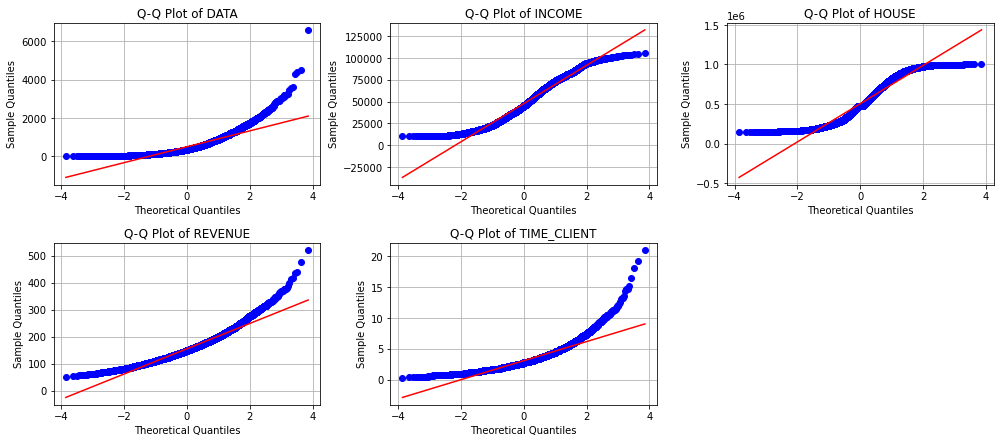

In [36]:
numerical_columns = train.select_dtypes(include=["float64"]).columns.to_list()
# numerical_columns.append('OVERCHARGE')
# numerical_columns.append('LEFTOVER')
# Iterate through each numeric column and create a Q-Q plot
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 3, idx)
    stats.probplot(train[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
plt.tight_layout()
plt.show()

On voit les différentes distributions des valeurs numériques. Elles suivent la loi normale avec une asymétrie droite ou gauche (right or left skewness).

In [37]:
numerical_columns.append('OVERCHARGE')
numerical_columns.append('LEFTOVER')
numerical_columns.append('HANDSET_PRICE')

In [38]:
numerical_columns

['DATA',
 'INCOME',
 'HOUSE',
 'REVENUE',
 'TIME_CLIENT',
 'OVERCHARGE',
 'LEFTOVER',
 'HANDSET_PRICE']

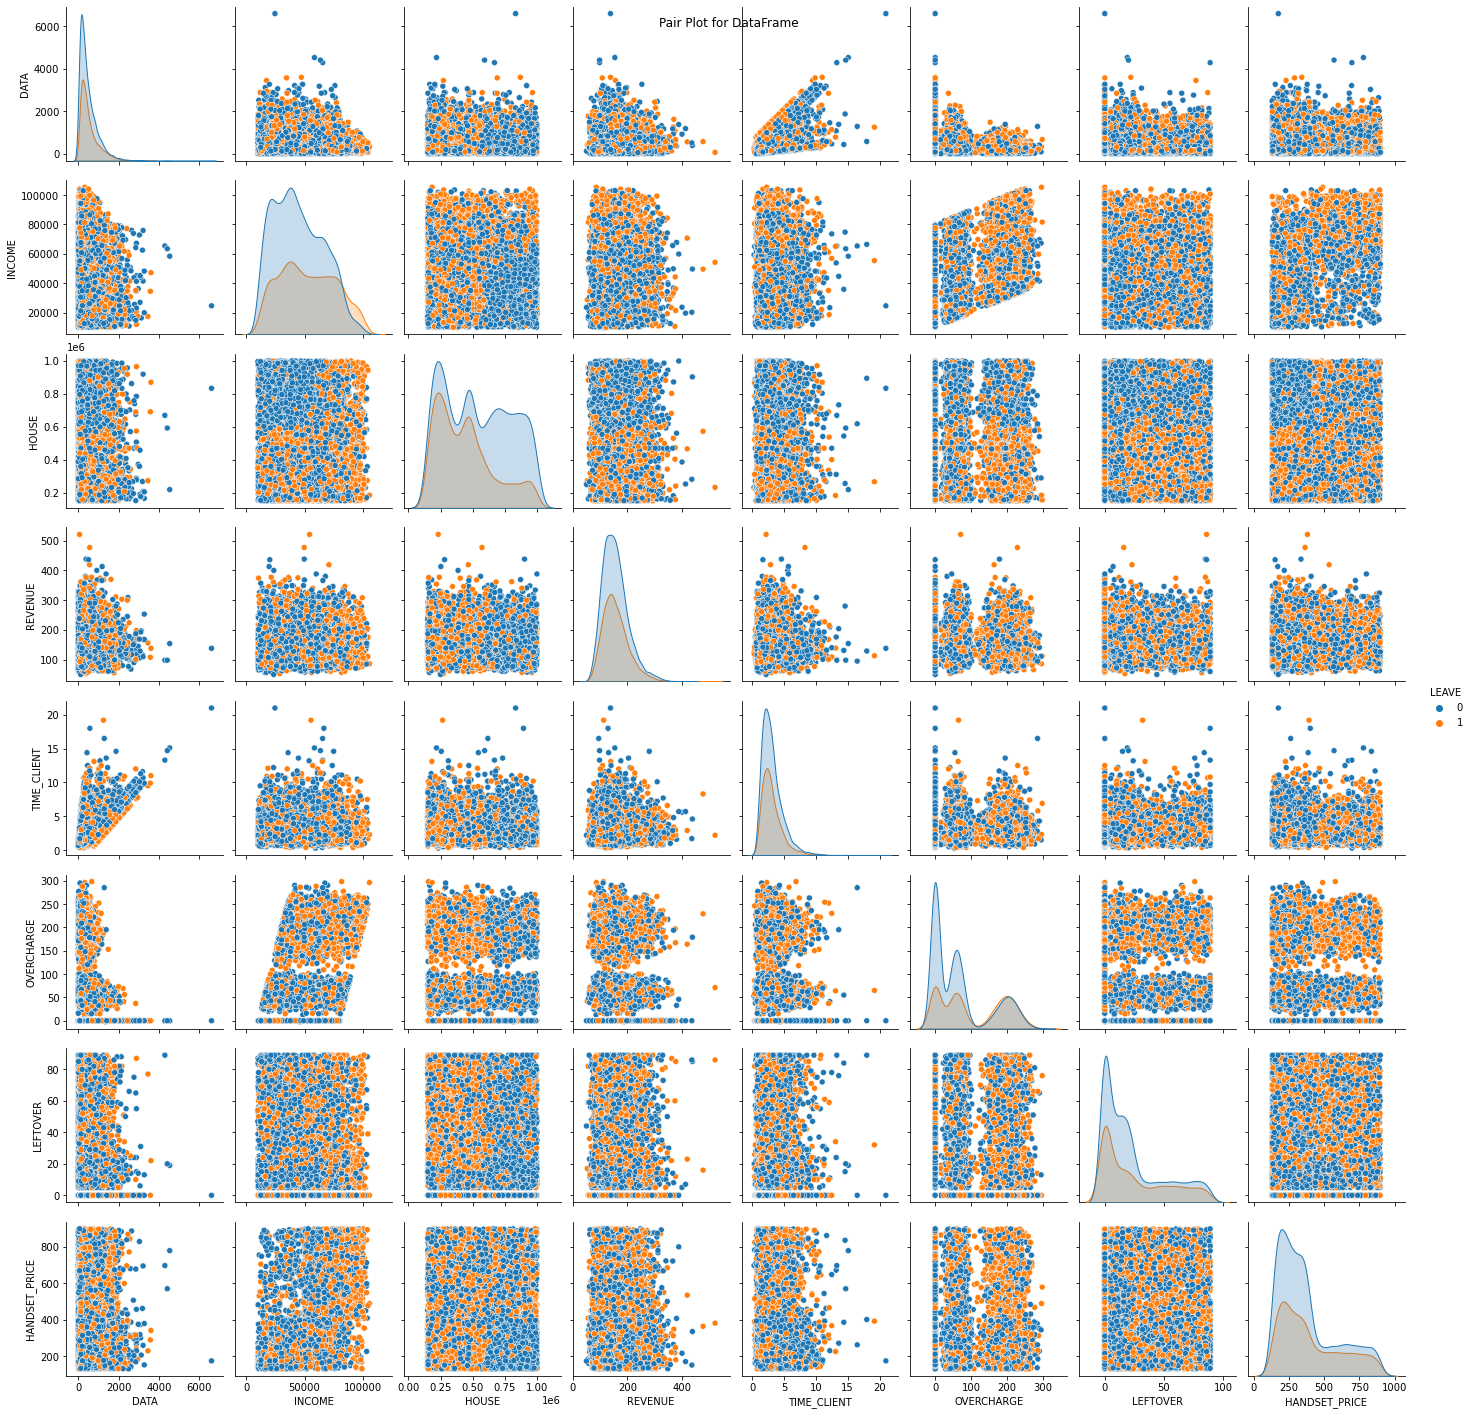

In [39]:
numerical_columns.append('LEAVE')
sns.pairplot(train[numerical_columns],hue='LEAVE')
             
plt.suptitle('Pair Plot for DataFrame')
plt.show()

On détecte beaucoup de corrélation et de linéraité entre les paramètres qui sont très corrélés comme DATA et TIME_CLIENT ...

Avant d'entamer nos prédictions nous allons supprimer les colonnes College et Job_class qui n'ajoutent aucune information pertinente à nos résultats.

# Prediction

In [40]:
train = train.drop('CHURNED',axis=1)
train

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,C100000,0,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,1,2,2,0
1,C100001,1,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,2,2,2,1
2,C100006,0,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,3,1,2,0
3,C100008,0,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,2,5,2,1
4,C100010,1,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,C115967,1,829.787234,40567.0,41,7,458723.0,True,0,4,128.0,305,5,3.9,4,3,2,1,0
11977,C115968,0,723.529412,75007.5,70,0,328171.0,True,3,1,199.0,610,5,4.1,13,2,2,1,1
11978,C115970,0,80.000000,77674.5,0,80,439967.0,True,3,1,94.0,750,1,1.4,1,2,2,1,1
11979,C115972,0,77.777778,37730.5,0,17,795808.0,False,3,1,142.0,284,0,1.7,8,1,2,2,0


In [41]:
X = train.iloc[:,1:-1]
y = train.iloc[:,-1:]

In [42]:
# y.values.ravel()
y = y.squeeze()
y.shape

(11981,)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

## Full Model 

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train = (X_train - X_train.mean())/X_train.std()
# X_test = (X_test - X_train.mean())/X_train.std()

full_model = LogisticRegression()
full_model.fit(X_train, y_train)
accuracy = full_model.score(X_train, y_train)
print('Classification accuracy: {:.2f}%'.format(accuracy * 100))

y_pred = full_model.predict(X_test)
valid = y_pred == y_test
acc = valid.sum(0)*100 / valid.size
print('Accuracy: {:.2f}%'.format(acc))

from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Classification accuracy: 72.89%
Accuracy: 73.92%
Confusion Matrix:
[[972 170]
 [299 357]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.81      1142
           1       0.68      0.54      0.60       656

    accuracy                           0.74      1798
   macro avg       0.72      0.70      0.70      1798
weighted avg       0.73      0.74      0.73      1798



## ROC AUC 

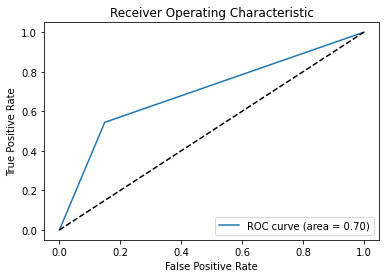

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming y_test is the true labels and y_proba is the predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Second Model

In [46]:
scaler = StandardScaler()
data_scaled = train.copy()
data_scaled.iloc[:, 1:-1] = scaler.fit_transform(data_scaled.iloc[:, 1:-1])
# data_scaled['LEAVE'] = data_scaled['LEAVE'].map({True: 1, False: 0})
model_binom = smf.logit('LEAVE ~ COLLEGE + JOB_CLASS + AVERAGE_CALL_DURATION + REVENUE + HANDSET_PRICE + REPORTED_USAGE_LEVEL + DATA + INCOME + OVERCHARGE + LEFTOVER + HOUSE + LESSTHAN600k + CHILD + OVER_15MINS_CALLS_PER_MONTH + TIME_CLIENT + REPORTED_SATISFACTION + CONSIDERING_CHANGE_OF_PLAN', data=data_scaled)
result_binom = model_binom.fit(maxiter=1000)
print(result_binom.summary())

Optimization terminated successfully.
         Current function value: 0.542641
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  LEAVE   No. Observations:                11981
Model:                          Logit   Df Residuals:                    11963
Method:                           MLE   Df Model:                           17
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.1729
Time:                        11:46:21   Log-Likelihood:                -6501.4
converged:                       True   LL-Null:                       -7860.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7200      0.022    -32.144      0.000   

On utilise la méthode de sélection par le biais des p-values, On garde les variables dont les p-values sont inférieure à 0.05, ce qui signifie que la variable a une faible probabilité d'être non pertinente pour le modèle. De première vue, on s'attend à enlever les attributs suivant : COLLEGE / JOB_CLASS / AVERAGE_CALL_DURATION / REVENUE / HOUSE / HANDSET_PRICE. Ce qui est cohérent avec les réusultats qu'on a obtenus au préalable. Pour automatiser la tâche, on implémente la fonction backward_selection qui élimine à chaque itération la variable avec la p-value maximale et s'arrête quand la valeur maximale est inférieure au seuil qu'on fixera à 0.05.

In [47]:
def backward_elimination(data, target, seuil=0.05):
    # Initialiser les variables avec toutes les colonnes de data sauf la cible
    formula = 'LEAVE ~ COLLEGE + JOB_CLASS + AVERAGE_CALL_DURATION + REVENUE + HANDSET_PRICE + REPORTED_USAGE_LEVEL + DATA + INCOME + OVERCHARGE + LEFTOVER + HOUSE + LESSTHAN600k + CHILD + OVER_15MINS_CALLS_PER_MONTH + TIME_CLIENT + REPORTED_SATISFACTION + CONSIDERING_CHANGE_OF_PLAN'
    model = smf.logit(formula, data=data)
#     print(formula)
    result = model.fit(maxiter=100,disp=0)  # disp=0 pour éviter les affichages intermédiaires
    p_values = result.pvalues.drop('Intercept', errors='ignore')
    max_pval = p_values.max()
    i=0
    excluded_list = []
    # Boucle de backward elimination
    while (max_pval>seuil) and (i<15):
        # Obtenir les p-valeurs
        p_values = result.pvalues.drop('Intercept', errors='ignore')
#         print(p_values)
        max_pval = p_values.max()  # Obtenir la p-valeur la plus grande
#         print(max_pval)
        if max_pval < seuil:
            break  # Si toutes les p-valeurs sont en-dessous du seuil, arrêter la boucle
        i+=1
        # Trouver la variable avec la plus grande p-valeur
        excluded_var = p_values.idxmax()
        excluded_list.append(excluded_var)
        print(f"Removing '{excluded_var}' with p-value {max_pval:.4f}")
        
        # Supprimer la variable avec la p-valeur maximale
        target, variables = formula.split(" ~ ")
        filtered_variables = " + ".join([var for var in variables.split(" + ") if var.strip() != excluded_var])
        formula = f"{target} ~ {filtered_variables}"
        model = smf.logit(formula, data=data)
        result = model.fit(maxiter=100, disp=0)

    return result, excluded_list

In [48]:
# Utilisation de la fonction pour éliminer les variables
result_binom_reduced, excluded_variables = backward_elimination(data_scaled, target='LEAVE',seuil=0.05)
print(result_binom_reduced.summary())

Removing 'HOUSE' with p-value 0.9538
Removing 'REVENUE' with p-value 0.5841
Removing 'AVERAGE_CALL_DURATION' with p-value 0.5676
Removing 'COLLEGE' with p-value 0.4029
Removing 'JOB_CLASS' with p-value 0.1672
Removing 'HANDSET_PRICE' with p-value 0.0608
Removing 'REPORTED_USAGE_LEVEL' with p-value 0.0570
                           Logit Regression Results                           
Dep. Variable:                  LEAVE   No. Observations:                11981
Model:                          Logit   Df Residuals:                    11970
Method:                           MLE   Df Model:                           10
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.1722
Time:                        11:46:22   Log-Likelihood:                -6506.6
converged:                       True   LL-Null:                       -7860.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z  

Avec la méthode de backward selection, on obtient les attributs suivants: DATA INCOME OVERCHARGE LEFTOVER LESSTHAN600K CHILD OVER_15MINS_CALLS_PER_MONTH TIME_CLIENT REPORTED_SATISFATCION & CONSIDERING_CHANGE_OF_PLAN. Seulement 10 attributs restants et des résultats satisfaisants (environ le même R-square, plus petite loglikelihood..).

In [49]:
excluded_variables

['HOUSE',
 'REVENUE',
 'AVERAGE_CALL_DURATION',
 'COLLEGE',
 'JOB_CLASS',
 'HANDSET_PRICE',
 'REPORTED_USAGE_LEVEL']

In [51]:
# filtered_variables

In [52]:
X1 = X.drop(excluded_variables,axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.15, random_state=0)

scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

model = LogisticRegression()
model.fit(X_train1, y_train1)
accuracy = model.score(X_train1, y_train1)
print('Classification accuracy: {:.2f}%'.format(accuracy * 100))

y_pred1 = model.predict(X_test1)
valid = y_pred1 == y_test1
acc = valid.sum() / valid.size
print('Accuracy: {:.2f}%'.format(acc*100))

from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred1))

print("\nClassification Report:")
print(classification_report(y_test1, y_pred1))

Classification accuracy: 72.82%
Accuracy: 73.86%
Confusion Matrix:
[[978 164]
 [306 350]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1142
           1       0.68      0.53      0.60       656

    accuracy                           0.74      1798
   macro avg       0.72      0.69      0.70      1798
weighted avg       0.73      0.74      0.73      1798



En enlevant les six colonnes qu'on a trouvé impertinante pendant notre analyse des données, nous obtenons de meilleurs résultats.

## ROC AUC

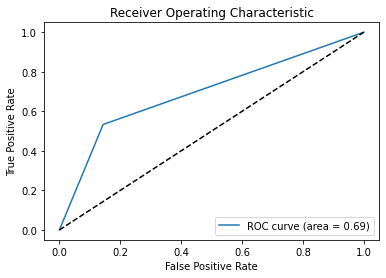

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming y_test is the true labels and y_proba is the predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred1)

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Modèle plus complexe : SVM & Decision Trees

In [66]:
from sklearn.svm import SVC
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [67]:
model_trees = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=8)
model_trees.fit(X_train, y_train)
accuracy_trees = model_trees.score(X_train, y_train)
print('Boosting classifier : Classification accuracy: {:.2f}%'.format(accuracy_trees * 100))
y_pred1 = model_trees.predict(X_test)
valid = y_pred == y_test
acc_trees = valid.sum() / valid.size
print('Accuracy: {:.2f}%'.format(acc_trees*100))

Boosting classifier : Classification accuracy: 78.15%
Accuracy: 73.92%


In [68]:
model_trees = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=8)
model_trees.fit(X_train1, y_train1)
accuracy_trees = model_trees.score(X_train1, y_train1)
print('Boosting classifier : Classification accuracy: {:.2f}%'.format(accuracy_trees * 100))
y_pred1 = model_trees.predict(X_test1)
valid = y_pred1 == y_test1
acc_trees = valid.sum() / valid.size
print('Accuracy: {:.2f}%'.format(acc_trees*100))

Boosting classifier : Classification accuracy: 72.05%
Accuracy: 72.14%


Pour améliorer la performance de notre modèle, on modifie les hyperparamètres et on utilise la validation croisée pour une validation plus robuste.

In [69]:
param_grid = {
    'base_estimator__max_depth': [3, 4, 5],  # Profondeur de l'arbre de décision
    'n_estimators': [50, 100, 150],          # Nombre d'estimateurs pour le Boosting
    'learning_rate': [0.5, 1.0, 1.5]         # Taux d'apprentissage pour AdaBoost
}
base_model = AdaBoostClassifier(DecisionTreeClassifier(), random_state=42)
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
# renvoyer le meilleur modèle
model_trees = grid_search.best_estimator_
model_trees.fit(X_train, y_train)
accuracy_trees = model_trees.score(X_train, y_train)
print('Boosting classifier - Training accuracy: {:.2f}%'.format(accuracy_trees * 100))
y_pred = model_trees.predict(X_test)
accuracy_test = model_trees.score(X_test, y_test)
print('Boosting classifier - Test accuracy: {:.2f}%'.format(accuracy_test * 100))

Boosting classifier - Training accuracy: 83.15%
Boosting classifier - Test accuracy: 79.09%


In [78]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[981 161]
 [215 441]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1142
           1       0.73      0.67      0.70       656

    accuracy                           0.79      1798
   macro avg       0.78      0.77      0.77      1798
weighted avg       0.79      0.79      0.79      1798



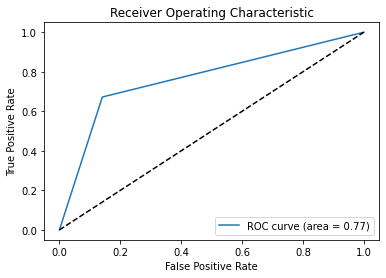

In [79]:
roc_auc = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [70]:
model_trees

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, random_state=42)

On obtient avec ce modèle obtenue après avoir sélectionné les meilleurs hyperparamètres une meilleure courbe ROC.

### Données Test :

In [72]:
test = pd.read_csv('validation.csv')

In [73]:
test.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,C100002,one,80.000000,45452.5,75,65,342741.0,True,3,1,149.0,300,3,2.2,2,unsat,little,considering
1,C100003,zero,536.842105,40703.5,90,0,215904.0,True,1,1,176.0,384,4,2.4,13,unsat,very_high,actively_looking_into_it
2,C100004,zero,256.578947,35563.0,52,0,341828.0,True,2,3,124.0,371,5,2.3,12,very_sat,avg,considering
3,C100005,zero,466.666667,66072.5,0,8,257222.0,True,3,1,279.0,324,1,2.8,5,very_sat,very_little,actively_looking_into_it
4,C100007,zero,150.000000,21901.5,0,0,800811.0,False,1,3,128.0,164,1,1.5,12,avg,very_high,perhaps


In [74]:
transform_data(test)
test.head(2)

  CUSTOMER_ID  COLLEGE        DATA   INCOME  OVERCHARGE  LEFTOVER     HOUSE  \
0     C100002        1   80.000000  45452.5          75        65  342741.0   
1     C100003        0  536.842105  40703.5          90         0  215904.0   

  LESSTHAN600k  CHILD  JOB_CLASS  REVENUE  HANDSET_PRICE  \
0         True      3          1    149.0            300   
1         True      1          1    176.0            384   

   OVER_15MINS_CALLS_PER_MONTH  TIME_CLIENT  AVERAGE_CALL_DURATION  \
0                            3          2.2                      2   
1                            4          2.4                     13   

   REPORTED_SATISFACTION  REPORTED_USAGE_LEVEL  CONSIDERING_CHANGE_OF_PLAN  
0                      2                     2                           2  
1                      2                     5                           1  


,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,C100002,1,80.000000,45452.5,75,65,342741.0,True,3,1,149.0,300,3,2.2,2,2,2,2
1,C100003,0,536.842105,40703.5,90,0,215904.0,True,1,1,176.0,384,4,2.4,13,2,5,1


In [75]:
test.isnull().sum()

CUSTOMER_ID                      0
COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          199
LESSTHAN600k                   199
CHILD                            0
JOB_CLASS                        0
REVENUE                          0
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
TIME_CLIENT                      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION            0
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
dtype: int64

In [76]:
transform_missing_values(test['HOUSE'])
test['LESSTHAN600k'].fillna(False,inplace=True)

In [77]:
test.isnull().sum()

CUSTOMER_ID                    0
COLLEGE                        0
DATA                           0
INCOME                         0
OVERCHARGE                     0
LEFTOVER                       0
HOUSE                          0
LESSTHAN600k                   0
CHILD                          0
JOB_CLASS                      0
REVENUE                        0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
TIME_CLIENT                    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
dtype: int64

In [82]:
X_test_final = test.copy()
X_test_final = X_test_final.iloc[:,1:]
X_test_final = scaler.transform(X_test_final) #normaliser avec les données train

y_pred = model_trees.predict(X_test_final)
proba = model_trees.predict_proba(X_test_final)
churn_proba = proba[:,1] #cette colonne représente la probabilité que la personne se désabonne

In [83]:
churn_threshold = 0.5
contact_threshold = 0.7  # Example de threshold pour contacter le client
discount_threshold = 0.8  # Example de threshold pour offrir une remise au client
customer_ids = test.iloc[:,0]
churn_label = ['LEAVE' if prob >= churn_threshold else 'STAY' for prob in churn_proba]

client_to_contact = ['YES' if prob >= contact_threshold else 'NO' for prob in churn_proba]

discounts = [10 if prob >= discount_threshold else 0 for prob in churn_proba]

In [84]:
output_df = pd.DataFrame({
    'CUSTOMER_ID': customer_ids,
    'CHURN_PROBABILITY': churn_proba,
    'CHURN_LABEL': churn_label,
    'CLIENT_TO_CONTACT': client_to_contact,
    'DISCOUNT': discounts
})

# Save the DataFrame to a CSV file
output_df.to_csv('churn_predictions.csv', index=False)

### Conclusion:

On a utilisé pendant notre méthode comme première approche, une régression logistique. Pour cela, nous avons sélectionné les meilleurs attributs en utilisant la backward selection. En calculant le score, on obtient un score de 73% ce qui est très moyen. Donc, on utilise un modèle plus complexe, on utilise les arbres de décision et on utilise les méthodes ensemblistes : Boosting plus précisément le AdaBoost. On choisit avec précision les 'meilleurs' hyperparamètres par cross-valisation : qui permettent de fournir le meilleur f1-score. Et on obtient donc un modèle qui fournit un score de 83%: un résultat plutôt satisfaisant!